In [136]:
import warnings
warnings.filterwarnings('ignore')

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the csv file and creating the dataframe

In [138]:
housing_df=pd.read_csv('Housing.csv')
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [139]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


# Cleaneup the data

In [140]:
status=pd.get_dummies(housing_df.furnishingstatus,drop_first=True)
housing_df=pd.concat([housing_df,status],axis=1)

In [141]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0,0


In [142]:
housing_df=housing_df.drop(['furnishingstatus'],1)

In [143]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
price              545 non-null int64
area               545 non-null int64
bedrooms           545 non-null int64
bathrooms          545 non-null int64
stories            545 non-null int64
mainroad           545 non-null object
guestroom          545 non-null object
basement           545 non-null object
hotwaterheating    545 non-null object
airconditioning    545 non-null object
parking            545 non-null int64
prefarea           545 non-null object
semi-furnished     545 non-null uint8
unfurnished        545 non-null uint8
dtypes: int64(6), object(6), uint8(2)
memory usage: 52.2+ KB


In [144]:
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking,semi-furnished,unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000


# Pairplot the deta

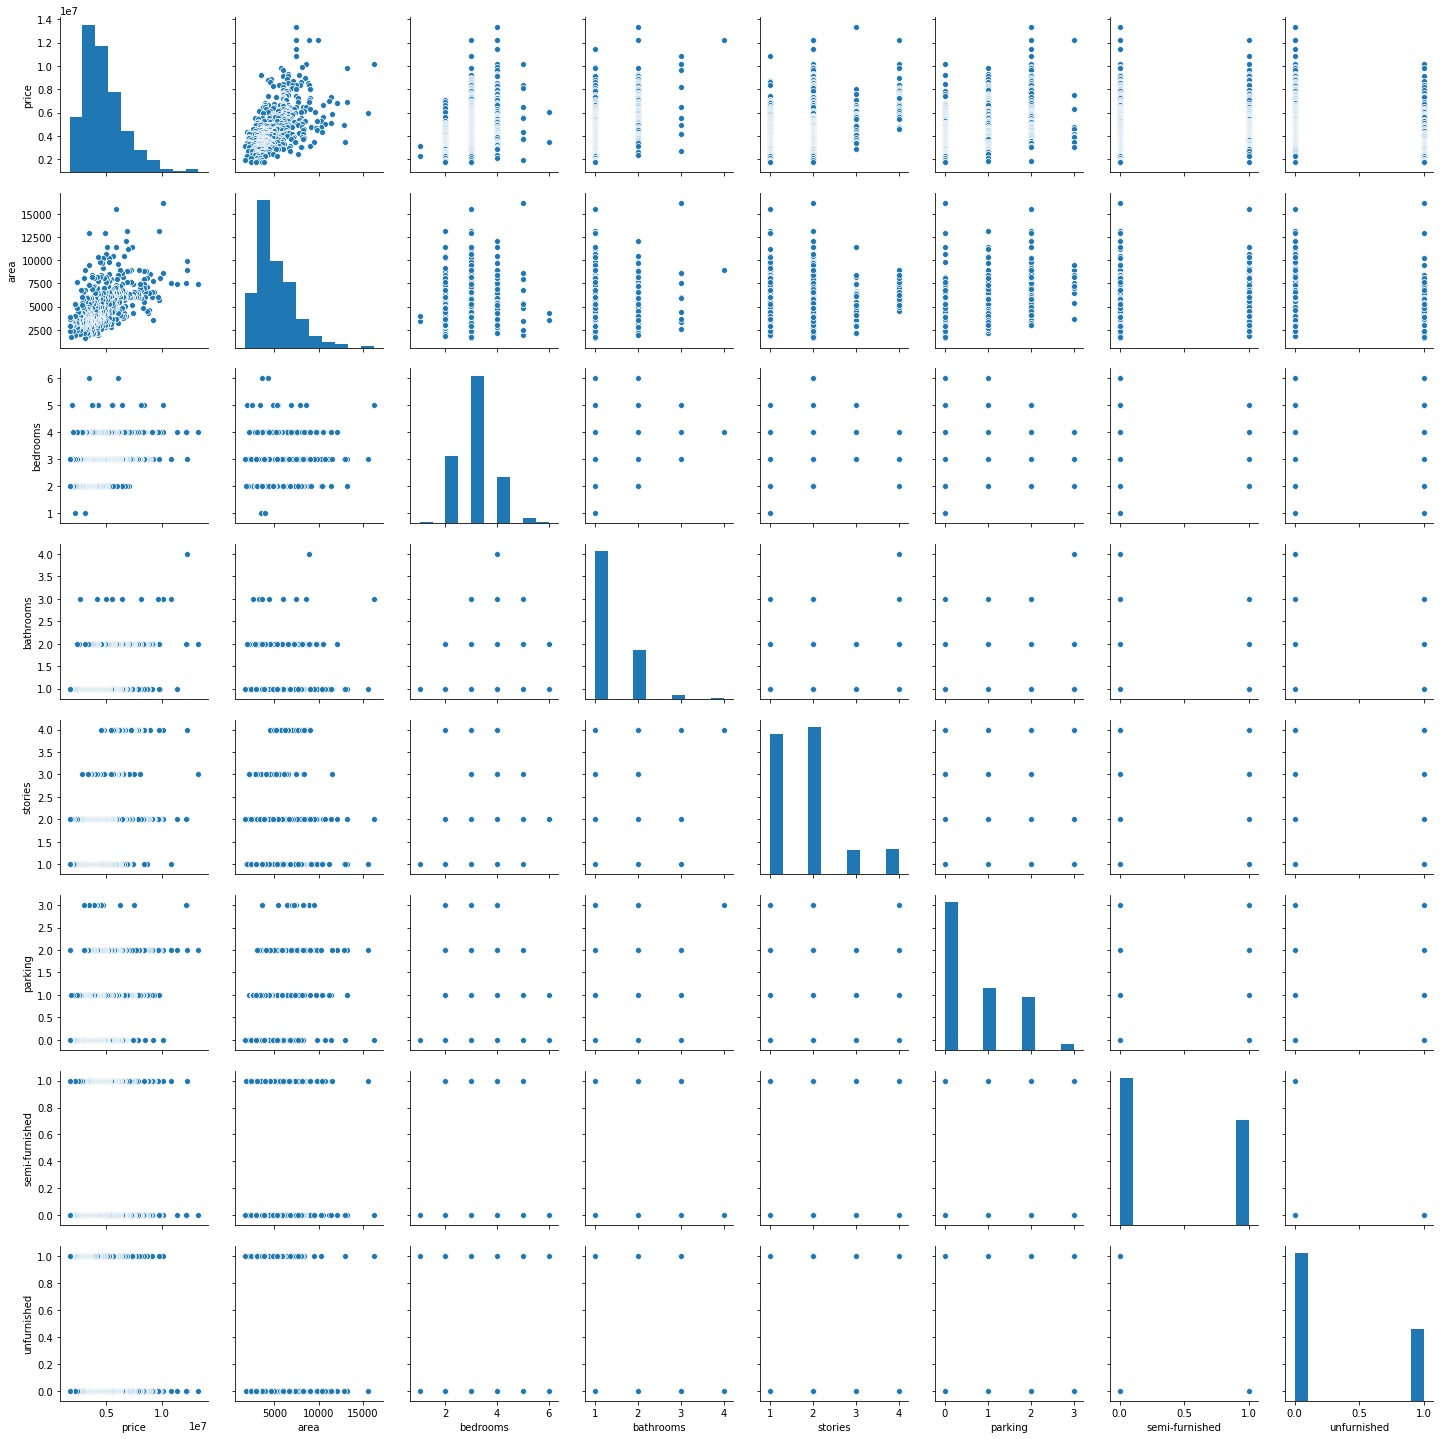

In [145]:
sns.pairplot(housing_df)

# Encoding the datas

In [146]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [147]:
housing_df.mainroad=le.fit_transform(housing_df.mainroad)
housing_df.guestroom=le.fit_transform(housing_df.guestroom)
housing_df.basement=le.fit_transform(housing_df.basement)
housing_df.hotwaterheating=le.fit_transform(housing_df.hotwaterheating)
housing_df.airconditioning=le.fit_transform(housing_df.airconditioning)
housing_df.prefarea=le.fit_transform(housing_df.prefarea)
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# Heatmap

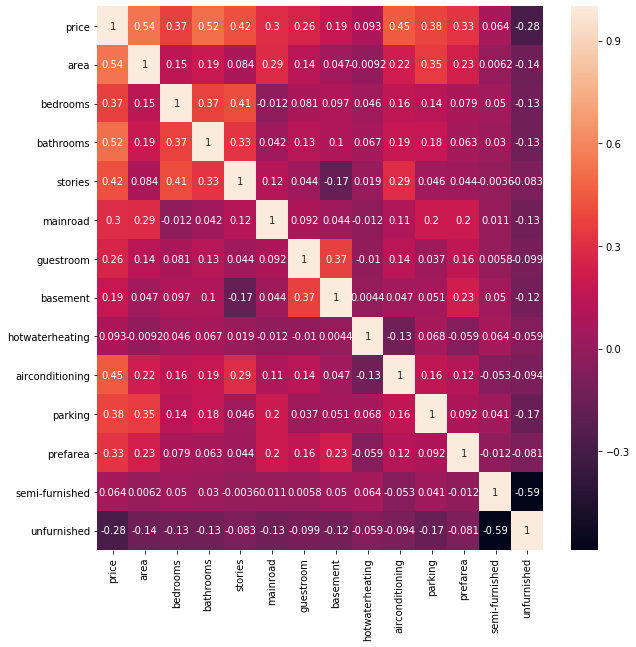

In [148]:
plt.figure(figsize=(10,10))
sns.heatmap(housing_df.corr(),annot=True)

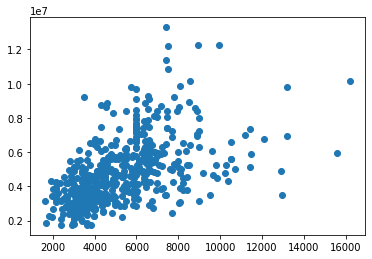

In [149]:
plt.scatter(housing_df.area,housing_df.price)

# Split to train and test

In [150]:
X= housing_df.drop(['price'],1)
y= housing_df.price

In [151]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [152]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [153]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# Scalling

In [154]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [155]:
lr=LinearRegression()
lr.fit(X_train,y_train)

rfe=RFE(lr,10)
rfe=rfe.fit(X_train,y_train)

In [156]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', False, 4),
 ('bedrooms', False, 2),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 3),
 ('unfurnished', True, 1)]

In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [162]:
X_train_scaled= pd.DataFrame(scaler.fit(X_train))

ValueError: DataFrame constructor not properly called!

In [163]:
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [164]:
num_var=['bathrooms', 'stories', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','unfurnished']
X_train[num_var]=scaler.fit_transform(X_train[num_var])
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
227,6000,2,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.333333,0.0,0,0.0
319,3000,4,0.000000,0.666667,1.0,0.0,1.0,0.0,1.0,0.666667,0.0,1,0.0
367,3630,2,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0,1.0
515,3210,3,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0,1.0
143,4800,5,0.333333,0.666667,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,0,1.0


In [165]:
X_train=X_train.drop(['area','bedrooms','semi-furnished'],1)

# State model(sm)

In [166]:
import statsmodels.api as sm

In [167]:
X_train_sm=sm.add_constant(X_train)
ols= sm.OLS(y_train,X_train_sm).fit()

In [168]:
X_train_sm.shape

(381, 11)

In [169]:
y_train.shape

(381,)

In [170]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     62.74
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           1.74e-73
Time:                        17:27:32   Log-Likelihood:                -5858.6
No. Observations:                 381   AIC:                         1.174e+04
Df Residuals:                     370   BIC:                         1.178e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.568e+06   1.82e+05     

# Finalize column name

In [171]:
X_train=X_train.drop(['guestroom'],1)

In [172]:
X_train_sm=sm.add_constant(X_train)
ols_2=sm.OLS(y_train,X_train_sm).fit()

In [173]:
print(ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     69.35
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           4.98e-74
Time:                        17:27:33   Log-Likelihood:                -5859.6
No. Observations:                 381   AIC:                         1.174e+04
Df Residuals:                     371   BIC:                         1.178e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.556e+06   1.82e+05     

In [174]:
X_train.columns

Index(['bathrooms', 'stories', 'mainroad', 'basement', 'hotwaterheating',
       'airconditioning', 'parking', 'prefarea', 'unfurnished'],
      dtype='object')

# Fit algorithm

In [175]:
from sklearn.linear_model import LinearRegression
lrm=LinearRegression()

In [176]:
lrm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
plt.plot(X_train,y_train,kind=scatter)

NameError: name 'scatter' is not defined

# For X test

In [178]:
num_var=X_test.columns

In [179]:
X_test[num_var]=scaler.fit_transform(X_test[num_var])

In [180]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
225,0.458812,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0,0.0
18,0.282567,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0
48,0.253831,0.333333,0.5,0.333333,1.0,0.0,1.0,0.0,0.0,0.333333,0.0,0.0,1.0
355,0.632184,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0
350,0.169540,0.000000,0.0,0.333333,1.0,0.0,0.0,1.0,0.0,0.333333,0.0,1.0,0.0


In [181]:
X_test_sm=sm.add_constant(X_test)
ols_3=sm.OLS(y_test,X_test_sm).fit()

In [182]:
print(ols_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     21.80
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           2.48e-28
Time:                        17:27:58   Log-Likelihood:                -2508.4
No. Observations:                 164   AIC:                             5045.
Df Residuals:                     150   BIC:                             5088.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.346e+06   3.93e+05     

In [183]:
X_test=X_test.drop(['hotwaterheating'],1)

In [184]:
X_test_sm=sm.add_constant(X_test)
ols_4=sm.OLS(y_test,X_test_sm).fit()

In [185]:
print(ols_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     23.73
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           5.45e-29
Time:                        17:28:02   Log-Likelihood:                -2508.5
No. Observations:                 164   AIC:                             5043.
Df Residuals:                     151   BIC:                             5083.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.392e+06   3.79e+05     

In [186]:
X_test=X_test.drop(['semi-furnished'],1)

In [187]:
X_test_sm=sm.add_constant(X_test)
ols_5=sm.OLS(y_test,X_test_sm).fit()

In [188]:
print(ols_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     25.99
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           1.19e-29
Time:                        17:28:06   Log-Likelihood:                -2508.7
No. Observations:                 164   AIC:                             5041.
Df Residuals:                     152   BIC:                             5079.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.294e+06   3.28e+05     

In [189]:
X_test_new=X_test[X_test.columns]
X_train_new=X_test[X_test.columns]
X_train_new.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,unfurnished
225,0.458812,0.000000,0.0,0.000000,1.0,0.0,0.0,1.0,1.000000,0.0,0.0
18,0.282567,0.333333,0.5,0.333333,1.0,1.0,0.0,1.0,0.666667,0.0,0.0
48,0.253831,0.333333,0.5,0.333333,1.0,0.0,1.0,0.0,0.333333,0.0,1.0
355,0.632184,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.666667,0.0,0.0
350,0.169540,0.000000,0.0,0.333333,1.0,0.0,0.0,0.0,0.333333,0.0,0.0


In [190]:
X_test_new.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,unfurnished
225,0.458812,0.000000,0.0,0.000000,1.0,0.0,0.0,1.0,1.000000,0.0,0.0
18,0.282567,0.333333,0.5,0.333333,1.0,1.0,0.0,1.0,0.666667,0.0,0.0
48,0.253831,0.333333,0.5,0.333333,1.0,0.0,1.0,0.0,0.333333,0.0,1.0
355,0.632184,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.666667,0.0,0.0
350,0.169540,0.000000,0.0,0.333333,1.0,0.0,0.0,0.0,0.333333,0.0,0.0


In [201]:
X_train_new.shape

(164, 11)

In [203]:
y_train.shape

(381,)

In [191]:
lrm.fit(X_train_new,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [164, 381]

In [192]:
y_pred=lrm.predict(X_train_new)

ValueError: shapes (164,11) and (9,) not aligned: 11 (dim 1) != 9 (dim 0)

In [193]:
from sklearn.metrics import r2_score

In [199]:
r2_score(y_test,y_pred)

NameError: name 'y_pred' is not defined